In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math


# reading in an image
image = mpimg.imread('Project 2 Images/475.jpg')
print('This image is:', type(image), 'with dimensions:', image.shape)
height,width,_ = image.shape
plt.imshow(image)
plt.show()

This image is: <class 'numpy.ndarray'> with dimensions: (720, 1280, 3)


<Figure size 640x480 with 1 Axes>

<class 'numpy.ndarray'>


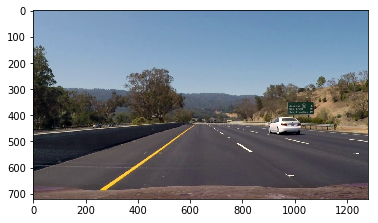

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


# reading in an image
image = mpimg.imread('Project 2 Images/475.jpg')
height,width,_ = image.shape

src = np.float32([[0, height], [width, height], [0, 0], [width, 0]])
#Camera Matrix
K = [[  1154.22732,   0,   671.627794],
 [  0,  1148.18221,   386.046312],
 [  0,   0,   1]]
K = cv2.UMat(np.array(K,dtype=np.uint8))
#Distortion Coefficients
dist = [[ -2.42565104e-01,  -4.77893070e-02,  -1.31388084e-03,  -8.79107779e-05, 2.20573263e-02]]
dist = cv2.UMat(np.array(dist,dtype=np.uint8))

newcameramtx, roi=cv2.getOptimalNewCameraMatrix(K,dist,(width,height),1,(width,height))

image2 = cv2.undistort(image, K, dist,None,newcameramtx)
#print (image2.get())
plt.imshow(image2.get())
#x,y,w,h = roi
#dst = image2[y:y+h, x:x+w]
#cv2.imwrite('calibresult.png',dst)

#print (image2.get())
#plt.imshow(dst)
plt.show()


In [4]:
def region_of_interest(img, vertices):
    # Define a blank matrix that matches the image height/width.
    mask = np.zeros_like(img)
    # Retrieve the number of color channels of the image.
    channel_count = img.shape[2]
    # Create a match color with the same color channel counts.
    match_mask_color = (255,) * channel_count
      
    # Fill inside the polygon
    cv2.fillPoly(mask, vertices, match_mask_color)
    
    # Returning the image only where mask pixels match
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


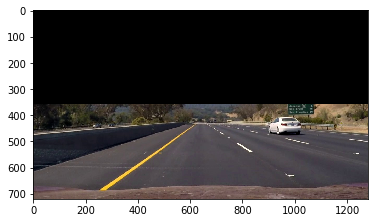

In [6]:
region_of_interest_vertices = [(0, height/2),(width, height/2),(width , height ),(0,height)]
image = mpimg.imread('Project 2 Images/475.jpg')
cropped_image = region_of_interest(
    image,
    np.array([region_of_interest_vertices], np.int32),
)

plt.figure()
plt.imshow(cropped_image)
plt.show()


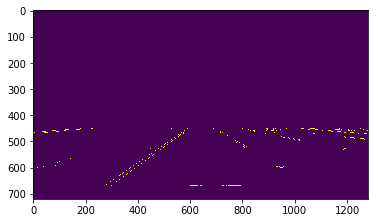

In [7]:
region_of_interest_vertices = [(0, 450),(width, 450),(width , 670 ),(0,670)]
image = mpimg.imread('Project 2 Images/510.jpg')
cropped_image = region_of_interest(
    image,
    np.array([region_of_interest_vertices], np.int32),
)

# Convert to grayscale here.
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)
# Call Canny Edge Detection here.
(thresh, bw_image) =  cv2.threshold(gray_image,128,255,cv2.THRESH_BINARY)
cannyed_image = cv2.Canny(bw_image, 20, 400)

plt.figure()
plt.imshow(cannyed_image)
plt.show()

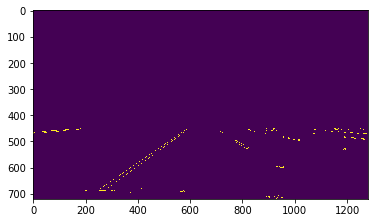

In [8]:
region_of_interest_vertices = [(0, 450),(width, 450),(width , 720 ),(0,720)]
image = mpimg.imread('Project 2 Images/510.jpg')
cropped_image = region_of_interest(
    image,
    np.array([region_of_interest_vertices], np.int32),
)

#Camera Matrix
K = [[  1154.22732,   0,   671.627794],
 [  0,  1148.18221,   386.046312],
 [  0,   0,   1]]
K = cv2.UMat(np.array(K,dtype=np.uint8))
#Distortion Coefficients
dist = [[ -2.42565104e-01,  -4.77893070e-02,  -1.31388084e-03,  -8.79107779e-05, 2.20573263e-02]]
dist = cv2.UMat(np.array(dist,dtype=np.uint8))

newcameramtx, roi=cv2.getOptimalNewCameraMatrix(K,dist,(width,height),1,(width,height))

image2 = cv2.undistort(cropped_image, K, dist,None,newcameramtx)

denoised_image = cv2.GaussianBlur(image2.get(),(5,5),0)

# Convert to grayscale here.
gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)
(thresh, bw_image) =  cv2.threshold(gray_image,128,255,cv2.THRESH_BINARY)
cannyed_image = cv2.Canny(bw_image, 20, 400)


lines = cv2.HoughLinesP(
    cannyed_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25)
#print(lines)


plt.figure()
plt.imshow(cannyed_image)
plt.show()

In [3]:
def draw_lines(img, lines, color=[0, 0, 255], thickness=8):
    
    if lines is None:
        return
    img = np.copy(img)
    # Create a blank image that matches the original in size.
    line_img = np.zeros(
        (
            img.shape[0],
            img.shape[1],
            3
        ),
        dtype=np.uint8,
    )
  
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
    img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
    return img

In [34]:
region_of_interest_vertices = [(0, 450),(width, 450),(width , 720 ),(0,720)]
image = mpimg.imread('Project 2 Images/510.jpg')
height,width,_ = image.shape
cropped_image = region_of_interest(
    image,
    np.array([region_of_interest_vertices], np.int32),
)

#Camera Matrix
K = [[  1154.22732,   0,   671.627794],
 [  0,  1148.18221,   386.046312],
 [  0,   0,   1]]
K = cv2.UMat(np.array(K,dtype=np.uint8))
#Distortion Coefficients
dist = [[ -2.42565104e-01,  -4.77893070e-02,  -1.31388084e-03,  -8.79107779e-05, 2.20573263e-02]]
dist = cv2.UMat(np.array(dist,dtype=np.uint8))

newcameramtx, roi=cv2.getOptimalNewCameraMatrix(K,dist,(width,height),1,(width,height))

image2 = cv2.undistort(cropped_image, K, dist,None,newcameramtx)

denoised_image = cv2.GaussianBlur(image2.get(),(5,5),0)

src = np.float32([[0, height], [1280, height], [0, 0], [width, 0]])
dst = np.float32([[600, height], [660, height], [0, 0], [width, 0]])
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation


#denoised_image = denoised_image[400:(height), 0:width] # Apply np slicing for ROI crop
warped_image = cv2.warpPerspective(denoised_image, M, (width, height)) # Image warping
#unwarped_image = cv2.warpPerspective(warped_image, Minv, (width, height))


gray_image = cv2.cvtColor(warped_image, cv2.COLOR_RGB2GRAY)
(thresh, bw_image) =  cv2.threshold(gray_image,128,255,cv2.THRESH_BINARY)
cannyed_image = cv2.Canny(bw_image, 20, 400)

lines = cv2.HoughLinesP(
    cannyed_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=10,
    maxLineGap=10)
#print(lines)

new_line = []
for line in lines:
    for x1, y1, x2, y2 in line:
        if x1 in range(200,width-200) and int(x2) in range(200,width-200):
            slope = (y2 - y1) / (x2 - x1)
            #print(line)
            #print(slope)
            pass
            if slope > -0.5 and slope < 0.5:
                #print(slope)
                pass
            else:
                #print(line)
                new_line.append(line)

line_image = draw_lines(warped_image, new_line) # <---- Add this call.
unwarped_image = cv2.warpPerspective(line_image, Minv, (width, height))

plt.figure()
plt.imshow(cropped_image)
plt.show()

TypeError: 'NoneType' object is not iterable

[[ 597  449 1077  449]]
0.0
[[328 634 419 574]]
-0.6593406593406593
[[312 449 338 450]]
0.038461538461538464
[[292 449 311 450]]
0.05263157894736842
[[513 509 595 450]]
-0.7195121951219512
[[377 601 429 567]]
-0.6538461538461539
[[780 509 828 540]]
0.6458333333333334
[[902 464 949 464]]
0.0
[[474 536 584 457]]
-0.7181818181818181
[[964 491 990 496]]
0.19230769230769232
[[272 449 302 450]]
0.03333333333333333
[[386 449 404 449]]
0.0
[[ 931  462 1021  462]]
0.0
[[254 453 276 452]]
-0.045454545454545456


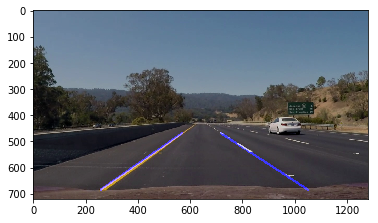

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

def region_of_interest(img, vertices):
    # Define a blank matrix that matches the image height/width.
    mask = np.zeros_like(img)
    # Retrieve the number of color channels of the image.
    channel_count = img.shape[2]
    # Create a match color with the same color channel counts.
    match_mask_color = (255,) * channel_count
      
    # Fill inside the polygon
    cv2.fillPoly(mask, vertices, match_mask_color)
    
    # Returning the image only where mask pixels match
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

image = mpimg.imread('Project 2 Images/475.jpg')
height,width,_ = image.shape

region_of_interest_vertices = [(0, 450),(width, 450),(width , 720 ),(0,720)]
cropped_image = region_of_interest(
    image,
    np.array([region_of_interest_vertices], np.int32),
)

#Camera Matrix
K = [[  1154.22732,   0,   671.627794],
 [  0,  1148.18221,   386.046312],
 [  0,   0,   1]]
K = cv2.UMat(np.array(K,dtype=np.uint8))
#Distortion Coefficients
dist = [[ -2.42565104e-01,  -4.77893070e-02,  -1.31388084e-03,  -8.79107779e-05, 2.20573263e-02]]
dist = cv2.UMat(np.array(dist,dtype=np.uint8))

newcameramtx, roi=cv2.getOptimalNewCameraMatrix(K,dist,(width,height),1,(width,height))

image2 = cv2.undistort(cropped_image, K, dist,None,newcameramtx)

denoised_image = cv2.GaussianBlur(image2.get(),(5,5),0)

# Convert to grayscale here.
gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)
(thresh, bw_image) =  cv2.threshold(gray_image,140,255,cv2.THRESH_BINARY)
cannyed_image = cv2.Canny(gray_image, 50, 400)

lines = cv2.HoughLinesP(
    cannyed_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=10,
    maxLineGap=20)
#print(lines)

left_line_x = []
left_line_y = []
right_line_x = []
right_line_y = []

new_line = []
for line in lines:
    for x1, y1, x2, y2 in line:
        if x1 in range(200,width-200) and int(x2) in range(200,width-200):
            print(line)
            slope = (y2 - y1) / (x2 - x1)
            print(slope)
            if slope > -0.4 and slope < 0.4:
                #print(slope)
                pass
            else :
                if slope < 0: 
                    #print(slope)
                    left_line_x.extend([x1, x2])
                    left_line_y.extend([y1, y2])
                else: 
                    #print(slope)
                    right_line_x.extend([x1, x2])
                    right_line_y.extend([y1, y2])
                #print(line)
                #new_line.append(line)
                
min_y = int(image.shape[0] * (3.25 / 5))# <-- Just below the horizon
max_y = int(image.shape[0]*(4.75/5)) # <-- The bottom of the image

poly_left = np.poly1d(np.polyfit(left_line_y,left_line_x,deg=1))

left_x_start = int(poly_left(max_y))
left_x_end = int(poly_left(min_y))

if not right_line_x:
    line_image = draw_lines(image,[[[left_x_start, max_y, left_x_end, min_y]]])
    print('no right line')
else:
    poly_right = np.poly1d(np.polyfit(right_line_y,right_line_x,deg=1))
    right_x_start = int(poly_right(max_y))
    right_x_end = int(poly_right(min_y))
    
    line_image = draw_lines(image,[[[left_x_start, max_y, left_x_end, min_y],[right_x_start, max_y, right_x_end, min_y]]])

#line_image = draw_lines(image, new_line) # <---- Add this call.
plt.figure()
plt.imshow(line_image)
plt.show()


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


def region_of_interest(img, vertices):
    # Define a blank matrix that matches the image height/width.
    mask = np.zeros_like(img)
    # Retrieve the number of color channels of the image.
    channel_count = img.shape[2]
    # Create a match color with the same color channel counts.
    match_mask_color = (255,) * channel_count

    # Fill inside the polygon
    cv2.fillPoly(mask, vertices, match_mask_color)

    # Returning the image only where mask pixels match
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


input_vid = 'project_video.mp4'
video = cv2.VideoCapture(input_vid)
status,image = video.read()
num = 0
status = True
h,w,l = image.shape
siz = (w,h)
op = cv2.VideoWriter('Output.avi',cv2.VideoWriter_fourcc(*'XVID'),30.0,siz)

while status:

    height,width,_ = image.shape

    region_of_interest_vertices = [(0, 450),(width, 450),(width , 720 ),(0,720)]
    cropped_image = region_of_interest(image,np.array([region_of_interest_vertices], np.int32))

    #Camera Matrix
    K = [[  1154.22732,   0,   671.627794],
     [  0,  1148.18221,   386.046312],
     [  0,   0,   1]]
    K = cv2.UMat(np.array(K,dtype=np.uint8))
    #Distortion Coefficients
    dist = [[ -2.42565104e-01,  -4.77893070e-02,  -1.31388084e-03,  -8.79107779e-05, 2.20573263e-02]]
    dist = cv2.UMat(np.array(dist,dtype=np.uint8))

    newcameramtx, roi=cv2.getOptimalNewCameraMatrix(K,dist,(width,height),1,(width,height))

    image2 = cv2.undistort(cropped_image, K, dist,None,newcameramtx)

    denoised_image = cv2.GaussianBlur(image2.get(),(5,5),0)

    # Convert to grayscale here.
    gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)
    # Call Canny Edge Detection here.
    cannyed_image = cv2.Canny(gray_image, 50, 400)

    lines = cv2.HoughLinesP(
        cannyed_image,
        rho=6,
        theta=np.pi / 60,
        threshold=160,
        lines=np.array([]),
        minLineLength=5,
        maxLineGap=20)
    #print(lines)

    left_line_x = []
    left_line_y = []
    right_line_x = []
    right_line_y = []

    #new_line = []
    for line in lines:
        for x1, y1, x2, y2 in line:
            if x1 in range(200,width-200) and int(x2) in range(200,width-200):
                slope = (y2 - y1) / (x2 - x1)
                #type(slope)
                if slope > -0.4 and slope < 0.4:
                    #print(slope)
                    pass
                else :
                    if slope < 0: 
                        left_line_x.extend([x1, x2])
                        left_line_y.extend([y1, y2])
                    else: 
                        right_line_x.extend([x1, x2])
                        right_line_y.extend([y1, y2])
                    #print(line)
                    #new_line.append(line)

    min_y = int(image.shape[0] * (3.25 / 5))# <-- Just below the horizon
    max_y = int(image.shape[0]*(4.75/5)) # <-- The bottom of the image


    if (not right_line_x) and (left_line_x):
        poly_left = np.poly1d(np.polyfit(left_line_y,left_line_x,deg=1))
        left_x_start = int(poly_left(max_y))
        left_x_end = int(poly_left(min_y))

        line_image = draw_lines(image,[[[left_x_start, max_y, left_x_end, min_y]]])
        
    elif (not left_line_x) and (right_line_x):
        poly_right = np.poly1d(np.polyfit(right_line_y,right_line_x,deg=1))
        right_x_start = int(poly_right(max_y))
        right_x_end = int(poly_right(min_y))

        line_image = draw_lines(image,[[[right_x_start, max_y, right_x_end, min_y]]])
    
    elif (not right_line_x) and (not left_line_x):
        #print('No Line Detected')
        pass
    
    else:
        poly_left = np.poly1d(np.polyfit(left_line_y,left_line_x,deg=1))
        left_x_start = int(poly_left(max_y))
        left_x_end = int(poly_left(min_y))
        
        poly_right = np.poly1d(np.polyfit(right_line_y,right_line_x,deg=1))
        right_x_start = int(poly_right(max_y))
        right_x_end = int(poly_right(min_y))
        
        line_image = draw_lines(image,[[[left_x_start, max_y, left_x_end, min_y],[right_x_start, max_y, right_x_end, min_y]]])

    #line_image = draw_lines(image, new_line) # <---- Add this call.

    cv2.imshow("Output",line_image)
    if cv2.waitKey(5)&0xff == 27:
        break

    op.write(image)

    status,image = video.read()
    num+=1

cv2.destroyAllWindows()
video.release()
op.release()
